In [ ]:
import math
import collections
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

from numpy import *
import networkx as nx
from networkx import *

%matplotlib inline

In [ ]:
from google.colab import drive#to open the google drive in colab
drive.mount('/content/drive')

In [ ]:
lines=[]
with open('/content/drive/My Drive/Case/nanoBloodProject/brushBox/wall&lipid_rider/brushWall/wall/flow/drug_delivery_box/wall_flow.dat') as fp:   # to read lines if atomlist after "Atoms"
        for line in fp:
            if 'Atoms' in line:                                         
                for line in fp: # now you are at the lines you want
                    if 'Velocities' in line: 
                     break 
                   
                    line=line.rstrip()# to remove any white spaces at the end of the string                  
                    #
                    lines.append(line)# add the string in to the list
                    #lines= line.split("space")# for line in a pandas data frame. here it can not read our lines separetely. it reads all lines as a line so does not split it into different indexs

In [ ]:
#remove empty lines from the list
while("" in lines) : 
    lines.remove("") 

In [ ]:
df=pd.DataFrame(lines, columns=['atomID']) # to make a data frame of pandas from the list and put atomID name on the column
df[['atomID','molID','atomType','charge','x','y','z','mx','my','mz']] = df.atomID.str.split(expand=True,) # to split one column to multiple columns and allocate name for each column
df

In [ ]:
atom_counter=len(df)
atom_counter

**read beads of first layer of wall**

In [ ]:
#find the z coordinate of the top layer of wall (which has the largest Z )
z=np.zeros(atom_counter)
#largest_z=np.zeros(atom_counter)

df.loc[:,'z'] = df.loc[:,'z'].astype(float)

largest = float("-inf") # negative infinity


for i in range(0, atom_counter):
    smallest = float("inf") # infinity. to renew after each i to just find min of each i not min of the whole.
  
  
  
    z[i]=df.loc[i,'z']

   
    #find the max of z direction
    num= float(z[i])    
    largest = max(largest,num)
    largest_z=largest
    largest_z=round(largest_z,4)
print(i,"  ",largest_z)

In [ ]:
#find the number  of beads in  the  top layer of the wall
topLayer_beads=0  

for i in range(0, atom_counter):   
   
   if round(z[i],4) == largest_z:
       topLayer_beads+=1   # thank GOD instead of making another for loop to go through the 4 bonded beads we used this counter annd it will only save bonded beads in the array
       
       print(topLayer_beads)

In [ ]:
#put beads of top layer in an array
top_layer=np.zeros(topLayer_beads)
counter=0  

for i in range(0, atom_counter):   
   
   if round(z[i],4) == largest_z:
       

       #top_layer[counter2]=df.loc[i,'atomID'] # array of atomID of beads that are in the upper layer of the wall
       top_layer[counter]=i # array of index of beads that are in the upper layer of the wall

       counter+=1   # thank GOD instead of making another for loop to go through the 4 bonded beads we used this counter annd it will only save bonded beads in the array
       

       print(counter,' ',top_layer)

In [ ]:
# to change atom type of beads in top layer in atom list.

df.loc[:,"atomType"] = df.loc[:,"atomType"].astype(int) #convert string to int

for i in top_layer.astype(int):
    
    
    df.loc[i,"atomType"] = '2'
    
#print (countType)
    #df.loc[df['atomID'] >atmCounter , 'atomID'] = df.loc[index,"atomID"]-atmCounter    #to modify the column of atomID after deleting the atoms of toluene in atom list. it is a if condition in python
print(df)

In [ ]:
# write the atomType of beads of top layer in a file
with open('/content/drive/My Drive/Case/nanoBloodProject/brushBox/wall&lipid_rider/brushWall/wall/flow/drug_delivery_box/topLayer_atomType.dat', 'w') as f: 
 for index in df.index:
  
   original_stdout = sys.stdout # Save a reference to the original standard output
   sys.stdout = f # Change the standard output to the file we created.
   print(df.loc[index,"atomType"])
   sys.stdout = original_stdout # Reset the standard output to its original value

**find the squarte lattice of beads on that upper layer of the wall**

In [ ]:
#sample of making  a squar lattice in python
G = nx.grid_2d_graph(4,4)
pos = dict( (n, n) for n in G.nodes() )
nx.draw_networkx(G, pos=pos, with_labels=False)
pp.axis('off')
pp.show()

In [ ]:
length=len(top_layer)

index=0

while index < length:
  print(top_layer[index])
  index+=1

In [ ]:
len(top_layer)

**find the square lattice in the fcc structure of the first row and first column of top layer of the wall**

here instead of finding distance between beads in the top layer of the wall which is a fcc lattice we want to make a square lattice so we first use the first row and column of top layer and then find the shortest distance to make a square lattice of node for that first row and column. so we can use this smallest distance and do not need to find the smallest distance in the whole beads of the top layer.

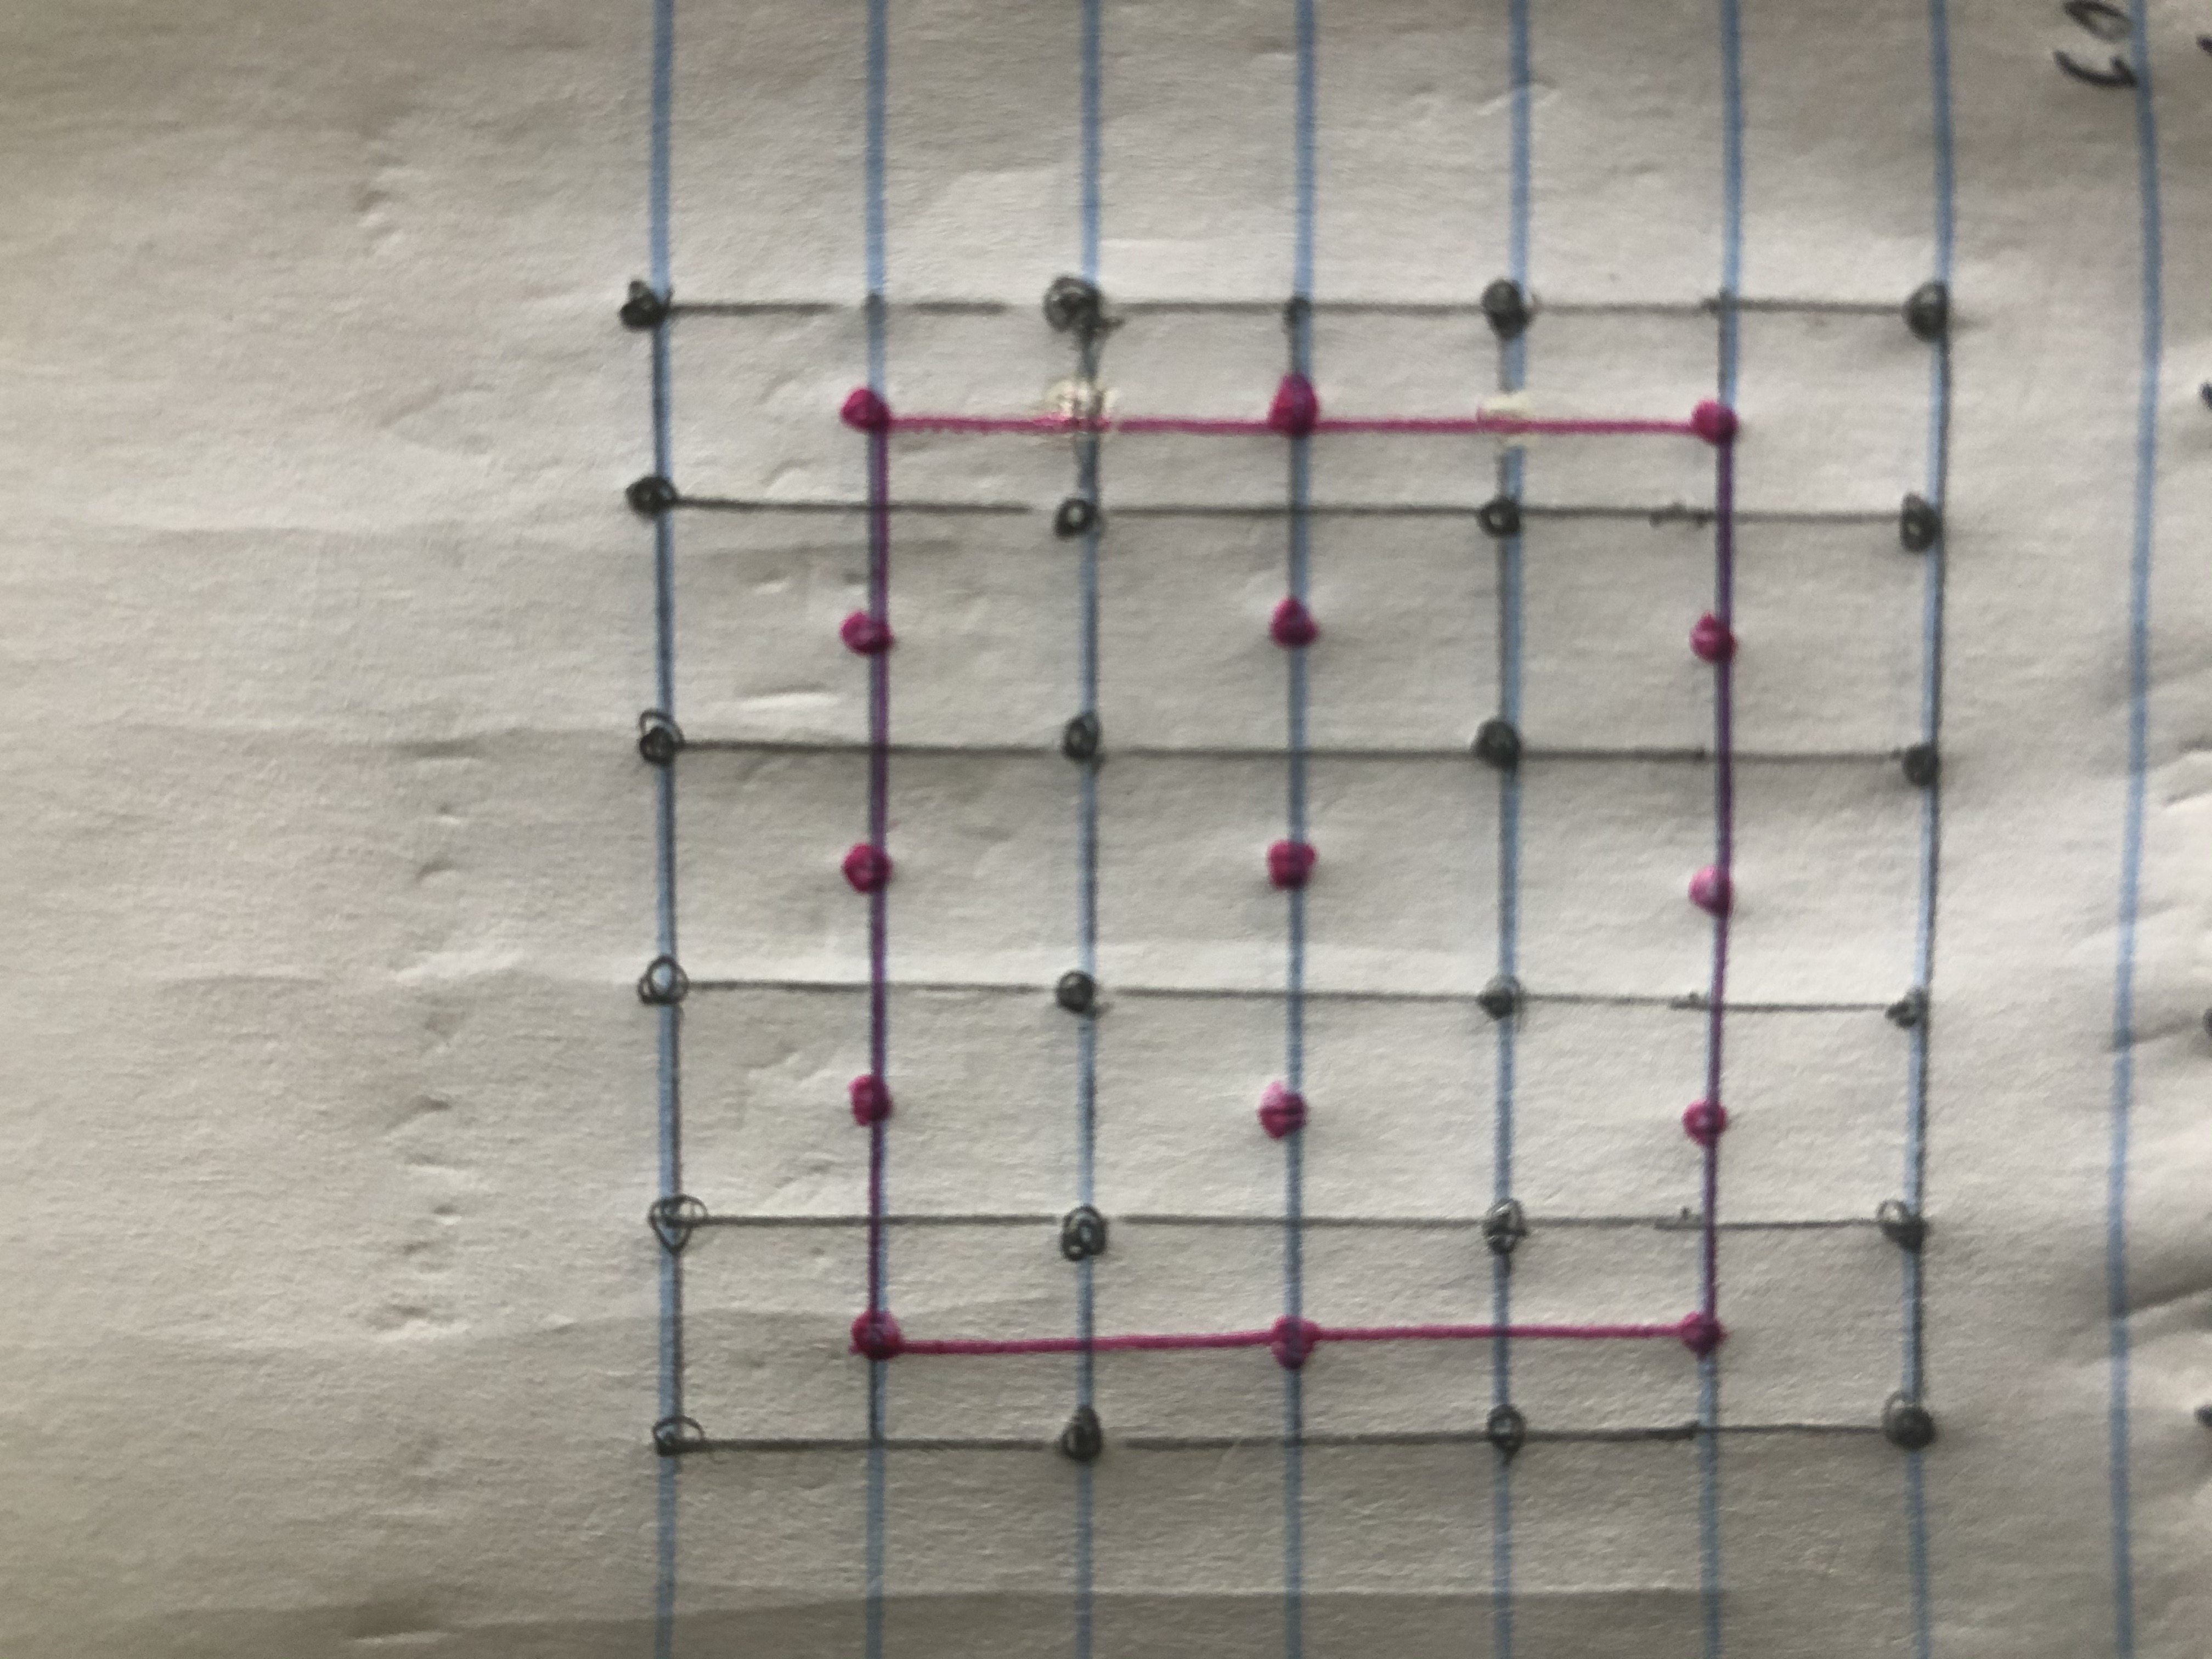

**black nodes**

In [ ]:
#find the number  of beads in  the  top layer within the largest z coords I mean the black nodes in the figure above (in fcc lattice we have two sets of rows. first one which is larger has 28 beads and the smaller one has 27 beads and we have 28, 27, 28 , ... beads' rows  ). so we 

#find the first row in x and y direction of square lattice in the fcc structure of the top layer of the wall
#find the number of beads in  the  first row and column
df.loc[:,'x'] = df.loc[:,'x'].astype(float) #convert string to foat for x , y , z 
df.loc[:,'y'] = df.loc[:,'y'].astype(float) #convert string to foat for x , y , z 

rowColumn_counter=0  
i=0

for i in top_layer.astype(int):
    if df.loc[i,'x'] == 0 or df.loc[i,'y'] == 0:

      #first_rowColumn[counter]=i # array of index of beads that are in the upper layer of the wall

      rowColumn_counter+=1
      #print(i,'  ',df.loc[i,"atomType"],'',df.loc[i,"atomID"])
      print(rowColumn_counter)

In [ ]:
#put beads of row and column in an array
first_rowColumn=np.zeros(rowColumn_counter)
counter=0  
i=0

for i in top_layer.astype(int):
    if df.loc[i,'x'] == 0 or df.loc[i,'y'] == 0:

      first_rowColumn[counter]=i # array of index of beads that are in the upper layer of the wall

      counter+=1

      #print(i,'  ',df.loc[i,"atomType"],'',df.loc[i,"atomID"])
print(first_rowColumn)

In [ ]:
 # change atom type of first row and column
i=0


for i in first_rowColumn.astype(int):
    if df.loc[i,'x'] == 0 or df.loc[i,'y'] == 0:

      df.loc[i,"atomType"] = '3'
      

print(df)     

In [ ]:
# write the atomType of beads of top layer in a file
with open('/content/drive/My Drive/Case/nanoBloodProject/brushBox/wall&lipid_rider/brushWall/wall/flow/drug_delivery_box/topLayer_atomType_firstRow3.dat', 'w') as f: 
 for index in df.index:
  
   original_stdout = sys.stdout # Save a reference to the original standard output
   sys.stdout = f # Change the standard output to the file we created.
   print(df.loc[index,"atomType"])
   sys.stdout = original_stdout # Reset the standard output to its original value

how to just read beads of top layer in a double for loop?
we read the index in for loops and the then say array[i] - array[j] so we will move inside array. Thank GOD!

In [ ]:
# to find the Rmsd of beads in first row and column of top layer of the wall


# make 2D arrays
Xmsd=np.zeros ((rowColumn_counter,rowColumn_counter))
Ymsd=np.zeros ((rowColumn_counter,rowColumn_counter))
Zmsd=np.zeros ((rowColumn_counter,rowColumn_counter))
#Rmsd=np.zeros ((atom_counter,atom_counter))
Rmsd=np.zeros ((rowColumn_counter,rowColumn_counter)) 
# #double array bc we want compare distances for each i and j  with each other
min_Rmsd=np.zeros (rowColumn_counter)
min_all=np.zeros (rowColumn_counter)

df.loc[:,'x'] = df.loc[:,'x'].astype(float) #convert string to foat for x , y , z 
df.loc[:,'y'] = df.loc[:,'y'].astype(float)
df.loc[:,'z'] = df.loc[:,'z'].astype(float)

length=len(top_layer)
#index=0
i=0
j=0

  

  

for i in range(0, rowColumn_counter-1): # counter is equal to length
  smallest = float("inf") # infinity. to renew after each i to just find min of each i not min of the whole.
  for j in range(i+1, rowColumn_counter):
  
    dx=df.loc[first_rowColumn[j],'x']-df.loc[first_rowColumn[i],'x']  # thank GOD we found the dx between the beads in the top layer
    dy=df.loc[first_rowColumn[j],'y']-df.loc[first_rowColumn[i],'y']
    dz=df.loc[first_rowColumn[j],'z']-df.loc[first_rowColumn[i],'z']
    
    Xmsd[i,j]+=np.power(dx,2)  # thank GOD but for Xmsd we do not need to  use Xmsd[top_layer[i], top_layer[j]] because we already did it for dx so for Xmsd and Rmsd we can  use the index i and j which are in the top layer array.
    Ymsd[i,j]+=np.power(dy,2)
    Zmsd[i,j]+=np.power(dz,2)
        
    #distance of all beads from each other without repeating 2-1 after calc distance of 1-2. it is distance of 3 and 4 and is not distance 3 ordistance of 4. Rmsd[3,4] and not Rmsd[3] or Rmsd[4]
    Rmsd[i,j]=math.sqrt(Xmsd[i,j]+Ymsd[i,j]+ Zmsd[i,j]);
    
    #find the min of Rmsd array
    num= float(Rmsd[i,j])    
    smallest = min(smallest,num)
    min_Rmsd[i]=smallest
    print(i,dx,dy,' ',Rmsd[i,j],'', min_Rmsd[i])

In [ ]:
#print(min_Rmsd[i])
print(i,(round(df.loc[i,'x'],1)))

In [ ]:
#to find min of all min_Rmsd
smallest = float("inf") # infinity
for i in range(0, rowColumn_counter-1): # we have five bond (distance) between 6 beads
    num= float(min_Rmsd[i])    
    smallest = min(smallest,num)
    min_all[i]=smallest
    #smallest_bead_distance= round(min_all[i],4)# round the float to 4 decimal
    smallest_bead_distance= min_all[i]
print (i,"    ",smallest_bead_distance)

**find the second row and column**

now we want to find the beads in the whole top layer that have that smaller distance among beads of row and columns and then make the square lattice

Method: here we have two ways of defining the position of node. 1)based on the distance (min_Rmsd[i]) which is 0.443 we choose distances of multiple of 10 to this 0.443. so we have 4.43, 8.86, 13.27, ...
2) based on dx or dy which we select the ones with constant distance so we cover the whole x and y directions. for example 0, 4.4, 8.8, 13.2, ...
since we have round(df.loc[i,'x'],1)=distance so we put distance with one decimal so for example instead of 8.86 we put 8.9
the issue is that in this high density wall the fcc structure of beads are not exact so for the distance of X we have 0.2, 4.7, 9.1, .. but for Y we have distance of 0.0, 4.4, 8.9,...

In [ ]:
#find the first row in x and y direction of square lattice in the fcc structure of the top layer of the wall
#find the number of beads in  the  first row and column
df.loc[:,'x'] = df.loc[:,'x'].astype(float) #convert string to foat for x , y , z 
df.loc[:,'y'] = df.loc[:,'y'].astype(float) #convert string to foat for x , y , z 

node_counter=0  
node_counter2=0  
node_counter3=0  
node_counter4=0 
node_counter5=0  
node_counter6=0  
node_counter7=0
node_counter_total=0

i=0

for i in top_layer.astype(int):
    #if round(df.loc[i,'x'],1) == 0.0 or round(df.loc[i,'y'],1) == 0.0 or round(df.loc[i,'x'],1) == 4.4 or round(df.loc[i,'y'],1) == 4.4 or round(df.loc[i,'x'],1) == 8.8 or round(df.loc[i,'y'],1) == 8.8 or round(df.loc[i,'x'],1) == 13.2 or round(df.loc[i,'y'],1) == 13.2 or round(df.loc[i,'x'],1) == 17.6 or round(df.loc[i,'y'],1) == 17.6 or round(df.loc[i,'x'],1) == 22.0 or round(df.loc[i,'y'],1) == 22.0 or round(df.loc[i,'x'],1) == 25.3 or round(df.loc[i,'y'],1) == 25.3 or round(df.loc[i,'x'],1) == 29.7 or round(df.loc[i,'y'],1) == 29.7:
    #if round(df.loc[i,'x'],1) == 0.0 or round(df.loc[i,'y'],1) == 0.0 or round(df.loc[i,'x'],1) == 4.4 or round(df.loc[i,'y'],1) == 4.4 or round(df.loc[i,'x'],1) == 8.8 or round(df.loc[i,'y'],1) == 8.8 or round(df.loc[i,'x'],1) == 13.2 or round(df.loc[i,'y'],1) == 13.2 or round(df.loc[i,'x'],1) == 17.6 or round(df.loc[i,'y'],1) == 17.6 or round(df.loc[i,'x'],1) == 22.0 or round(df.loc[i,'y'],1) == 22.0 or round(df.loc[i,'x'],1) == 26.4 or round(df.loc[i,'y'],1) == 26.4:
    
    if round(df.loc[i,'x'],1) == 0.2 and (round(df.loc[i,'y'],1) == 0.0 or round(df.loc[i,'y'],1) == 4.4 or round(df.loc[i,'y'],1) == 8.9 or round(df.loc[i,'y'],1) == 13.3 or round(df.loc[i,'y'],1) == 17.7 or round(df.loc[i,'y'],1) == 22.2 or round(df.loc[i,'y'],1) ==26.6):
     node_counter+=1
     df.loc[i,"atomType"] = '5'  
    if round(df.loc[i,'x'],1) == 4.7 and (round(df.loc[i,'y'],1) == 0.0 or round(df.loc[i,'y'],1) == 4.4 or round(df.loc[i,'y'],1) == 8.9 or round(df.loc[i,'y'],1) == 13.3 or round(df.loc[i,'y'],1) == 17.7 or round(df.loc[i,'y'],1) == 22.2 or round(df.loc[i,'y'],1) == 26.6): 
     node_counter2+=1
     df.loc[i,"atomType"] = '5'
    if round(df.loc[i,'x'],1) == 9.1 and (round(df.loc[i,'y'],1) == 0.0 or round(df.loc[i,'y'],1) == 4.4 or round(df.loc[i,'y'],1) == 8.9 or round(df.loc[i,'y'],1) == 13.3 or round(df.loc[i,'y'],1) == 17.7 or round(df.loc[i,'y'],1) == 22.2 or round(df.loc[i,'y'],1) == 26.6): 
     node_counter3+=1
     df.loc[i,"atomType"] = '5'
    if round(df.loc[i,'x'],1) == 13.5 and (round(df.loc[i,'y'],1) == 0.0 or round(df.loc[i,'y'],1) == 4.4 or round(df.loc[i,'y'],1) == 8.9 or round(df.loc[i,'y'],1) == 13.3 or round(df.loc[i,'y'],1) == 17.7 or round(df.loc[i,'y'],1) == 22.2 or round(df.loc[i,'y'],1) == 26.6): 
     node_counter4+=1
     df.loc[i,"atomType"] = '5'
    if round(df.loc[i,'x'],1) == 17.9 and (round(df.loc[i,'y'],1) == 0.0 or round(df.loc[i,'y'],1) == 4.4 or round(df.loc[i,'y'],1) == 8.9 or round(df.loc[i,'y'],1) == 13.3 or round(df.loc[i,'y'],1) == 17.7 or round(df.loc[i,'y'],1) == 22.2 or round(df.loc[i,'y'],1) == 26.6): 
     node_counter5+=1
     df.loc[i,"atomType"] = '5'
    if round(df.loc[i,'x'],1) == 22.4 and (round(df.loc[i,'y'],1) == 0.0 or round(df.loc[i,'y'],1) == 4.4 or round(df.loc[i,'y'],1) == 8.9  or round(df.loc[i,'y'],1) == 13.3 or round(df.loc[i,'y'],1) == 17.7 or round(df.loc[i,'y'],1) == 22.2 or round(df.loc[i,'y'],1) == 26.6): 
     node_counter6+=1
     df.loc[i,"atomType"] = '5'
    if round(df.loc[i,'x'],1) == 26.4 and (round(df.loc[i,'y'],1) == 0.0 or round(df.loc[i,'y'],1) == 4.4 or round(df.loc[i,'y'],1) == 8.9 or round(df.loc[i,'y'],1) == 13.3 or round(df.loc[i,'y'],1) == 17.7 or round(df.loc[i,'y'],1) == 22.2 or round(df.loc[i,'y'],1) == 26.6):
     node_counter7+=1
     df.loc[i,"atomType"] = '5'
    #if round(df.loc[i,'x'],1) == 28.6 or round(df.loc[i,'y'],1) == 28.6 :
      #first_rowColumn[counter]=i # array of index of beads that are in the upper layer of the wall

node_counter_total=node_counter+node_counter2+node_counter3+node_counter4+node_counter5+node_counter6+node_counter7
      #print(i,'  ',df.loc[i,"atomType"],'',df.loc[i,"atomID"])
print(node_counter_total)
#print(df) 

In [ ]:
# write the atomType of nodes of top layer in a file for EG brushes with grafting density of 0.06
with open('/content/drive/My Drive/Case/nanoBloodProject/brushBox/wall&lipid_rider/brushWall/wall/flow/drug_delivery_box/nodes_EG/topLayer_atomType_secondRow777777.dat', 'w') as f: 
 for index in df.index:
  
   original_stdout = sys.stdout # Save a reference to the original standard output
   sys.stdout = f # Change the standard output to the file we created.
   print(df.loc[index,"atomType"])
   sys.stdout = original_stdout # Reset the standard output to its original value

**old code --------------------------------**

In [ ]:
# to find the Rmsd of beads in top layer of the wall
# and to find the x and y dimension of top layer of the wall

# make 2D arrays
Xmsd=np.zeros ((topLayer_beads,topLayer_beads))
Ymsd=np.zeros ((topLayer_beads,topLayer_beads))
Zmsd=np.zeros ((topLayer_beads,topLayer_beads))

Rmsd=np.zeros ((topLayer_beads,topLayer_beads)) 
# #double array bc we want compare distances for each i and j  with each other
#min_Rmsd=np.zeros (topLayer_beads)
#min_all=np.zeros (topLayer_beads)

df.loc[:,'x'] = df.loc[:,'x'].astype(float) #convert string to foat for x , y , z 
df.loc[:,'y'] = df.loc[:,'y'].astype(float)
df.loc[:,'z'] = df.loc[:,'z'].astype(float)

#length=len(top_layer)

i=0
j=0

    
#largest_dx=0
#largest_dy=0
#largest = float("-inf") # negative infinity
  

for i in range(0, topLayer_beads-1): # counter is equal to length
  #smallest = float("inf") # infinity. to renew after each i to just find min of each i not min of the whole.
  for j in range(i+1, topLayer_beads):
  
    dx=df.loc[top_layer[j],'x']-df.loc[top_layer[i],'x']  # thank GOD we found the dx between the beads in the top layer
    dy=df.loc[top_layer[j],'y']-df.loc[top_layer[i],'y']
    dz=df.loc[top_layer[j],'z']-df.loc[top_layer[i],'z']
    
    Xmsd[i,j]+=np.power(dx,2)  # thank GOD but for Xmsd we do not need to  use Xmsd[top_layer[i], top_layer[j]] because we already did it for dx so for Xmsd and Rmsd we can  use the index i and j which are in the top layer array.
    Ymsd[i,j]+=np.power(dy,2)
    Zmsd[i,j]+=np.power(dz,2)
        
    #distance of all beads from each other without repeating 2-1 after calc distance of 1-2. it is distance of 3 and 4 and is not distance 3 ordistance of 4. Rmsd[3,4] and not Rmsd[3] or Rmsd[4]
    Rmsd[i,j]=math.sqrt(Xmsd[i,j]+Ymsd[i,j]+ Zmsd[i,j]);
    
    #find the min of Rmsd array
    #num= float(Rmsd[i,j])    
    #smallest = min(smallest,num)
    #min_Rmsd[i]=smallest
     


 # to find the x and y dimension of top layer of the wall
    #num= float(dx) #find max of dx to understand the length of top layer in x direction   
    #largest = max(largest,num)
    #largest_dx=largest
    

    #numY= float(dy)    
    #largest = max(largest,numY)
    #largest_dy=largest
   


    #print (i,"    ",largest_dx,'  ', largest_dy)

now we want to find the beads in the whole top layer that have that smaller distance among beads of row and columns and then make the square lattice

In [ ]:
#to show the number of beads with distance of grafting density and count the number of bonds with that distance that are in the top layer
count=0
count_bonded=np.zeros(topLayer_beads)

i=0
j=0

for i in range(0, topLayer_beads-1): # counter is equal to length

  for j in range(i+1, topLayer_beads):
  #for j in range(1, counter):

 # for grafting density of 0.06 we need distance of 4.08 between nodes when box x and y dimensions are 30 nm but in our fcc lattice which x and y dimensions are 29.72 nm I need to use 4.082/ 0.7783 =5.24 so we use it as 5 and 5 *0.7783= 3.89 which we will use here. bc of we need 5 times ( or 2 times  or three time )of each bond to pass through the nodes with distance 0.7783.so 5.24 give the ratio of desired distance 4.08 to our bond distance and 5 show number of nodes we can pass to reach to aroundd that distance. Thank GOD
   #if round(Rmsd[i,j],2) == 3.89:
   #distance_graftingDensity=5 * 0.7782717162260099
   #distance_graftingDensity=5 * 1.1006424162982071
   #distance_graftingDensity=4 * smallest_bead_distance
   distance_graftingDensity=1.1006424162982071
   #if round(Rmsd[i,j],14) == round(distance_graftingDensity,14):  
   if Rmsd[i,j] == distance_graftingDensity:
    #nodes_topLayer[count]=df.loc[i,'atomID']
    count+=1
    count_bonded[i]+=1 # count number of bonds
   
    print (count_bonded[i],'  ',count,'  ',i,'   ',j,'   ',Rmsd[i,j],'',df.loc[top_layer[i],'atomID'])
    

In [ ]:
nodes_topLayer=np.zeros(count)
counter=0
i=0
j=0

for i in range(0, topLayer_beads-1): # counter is equal to length

  for j in range(i+1, topLayer_beads):
    if round(Rmsd[i,j],14) == round(distance_graftingDensity,14): 
       
       nodes_topLayer[counter]=df.loc[top_layer[i],'atomID']
       counter+=1
print (nodes_topLayer.astype(int))

In [ ]:
 # change atom type of beads in the nodes array
i=0


for i in nodes_topLayer.astype(int):
    df.loc[i,"atomType"] = '4'
    #print(i)  

print(df)  

In [ ]:
# write the atomType of beads in the nodes array in a file
with open('/content/drive/My Drive/Case/nanoBloodProject/brushBox/realWall/topLayer_atomType_nodes.dat', 'w') as f: 
 for index in df.index:
  
   original_stdout = sys.stdout # Save a reference to the original standard output
   sys.stdout = f # Change the standard output to the file we created.
   print(df.loc[index,"atomType"])
   sys.stdout = original_stdout # Reset the standard output to its original value

In [ ]:
#to find max of count_bonded. Thank GOD that for a 2d lattice the max number of bonds for each bead is 2 while in a 3d lattice is 4
largest_count_bonded=np.zeros(topLayer_beads)
largest = float("-inf") # negative infinity
i=0

for i in range(0, topLayer_beads): # we have five bond (distance) between 6 beads
    num= float(count_bonded[i])    
    largest = max(largest,num)
    largest_count_bonded[i]=largest
    #smallest_bead_distance= round(min_all[i],4)# round the float to 4 decimal
print (i,"    ",largest_count_bonded[i])

In [ ]:
#to show the atomID of beads that have 1 bonds and count their number
count=0
i=0

for i in range(0, topLayer_beads):
  if count_bonded[i] == 2:
    count+=1
    print (count,'  ',i,'   ',count_bonded[i],'   ',df.loc[i,'atomID'])

old cod ---------------------------------------------